In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning

In [2]:
# Load train data from csv file
train_data = pd.read_csv('train.csv')

# Load test data from csv file
test_data = pd.read_csv('test.csv')


<AxesSubplot:>

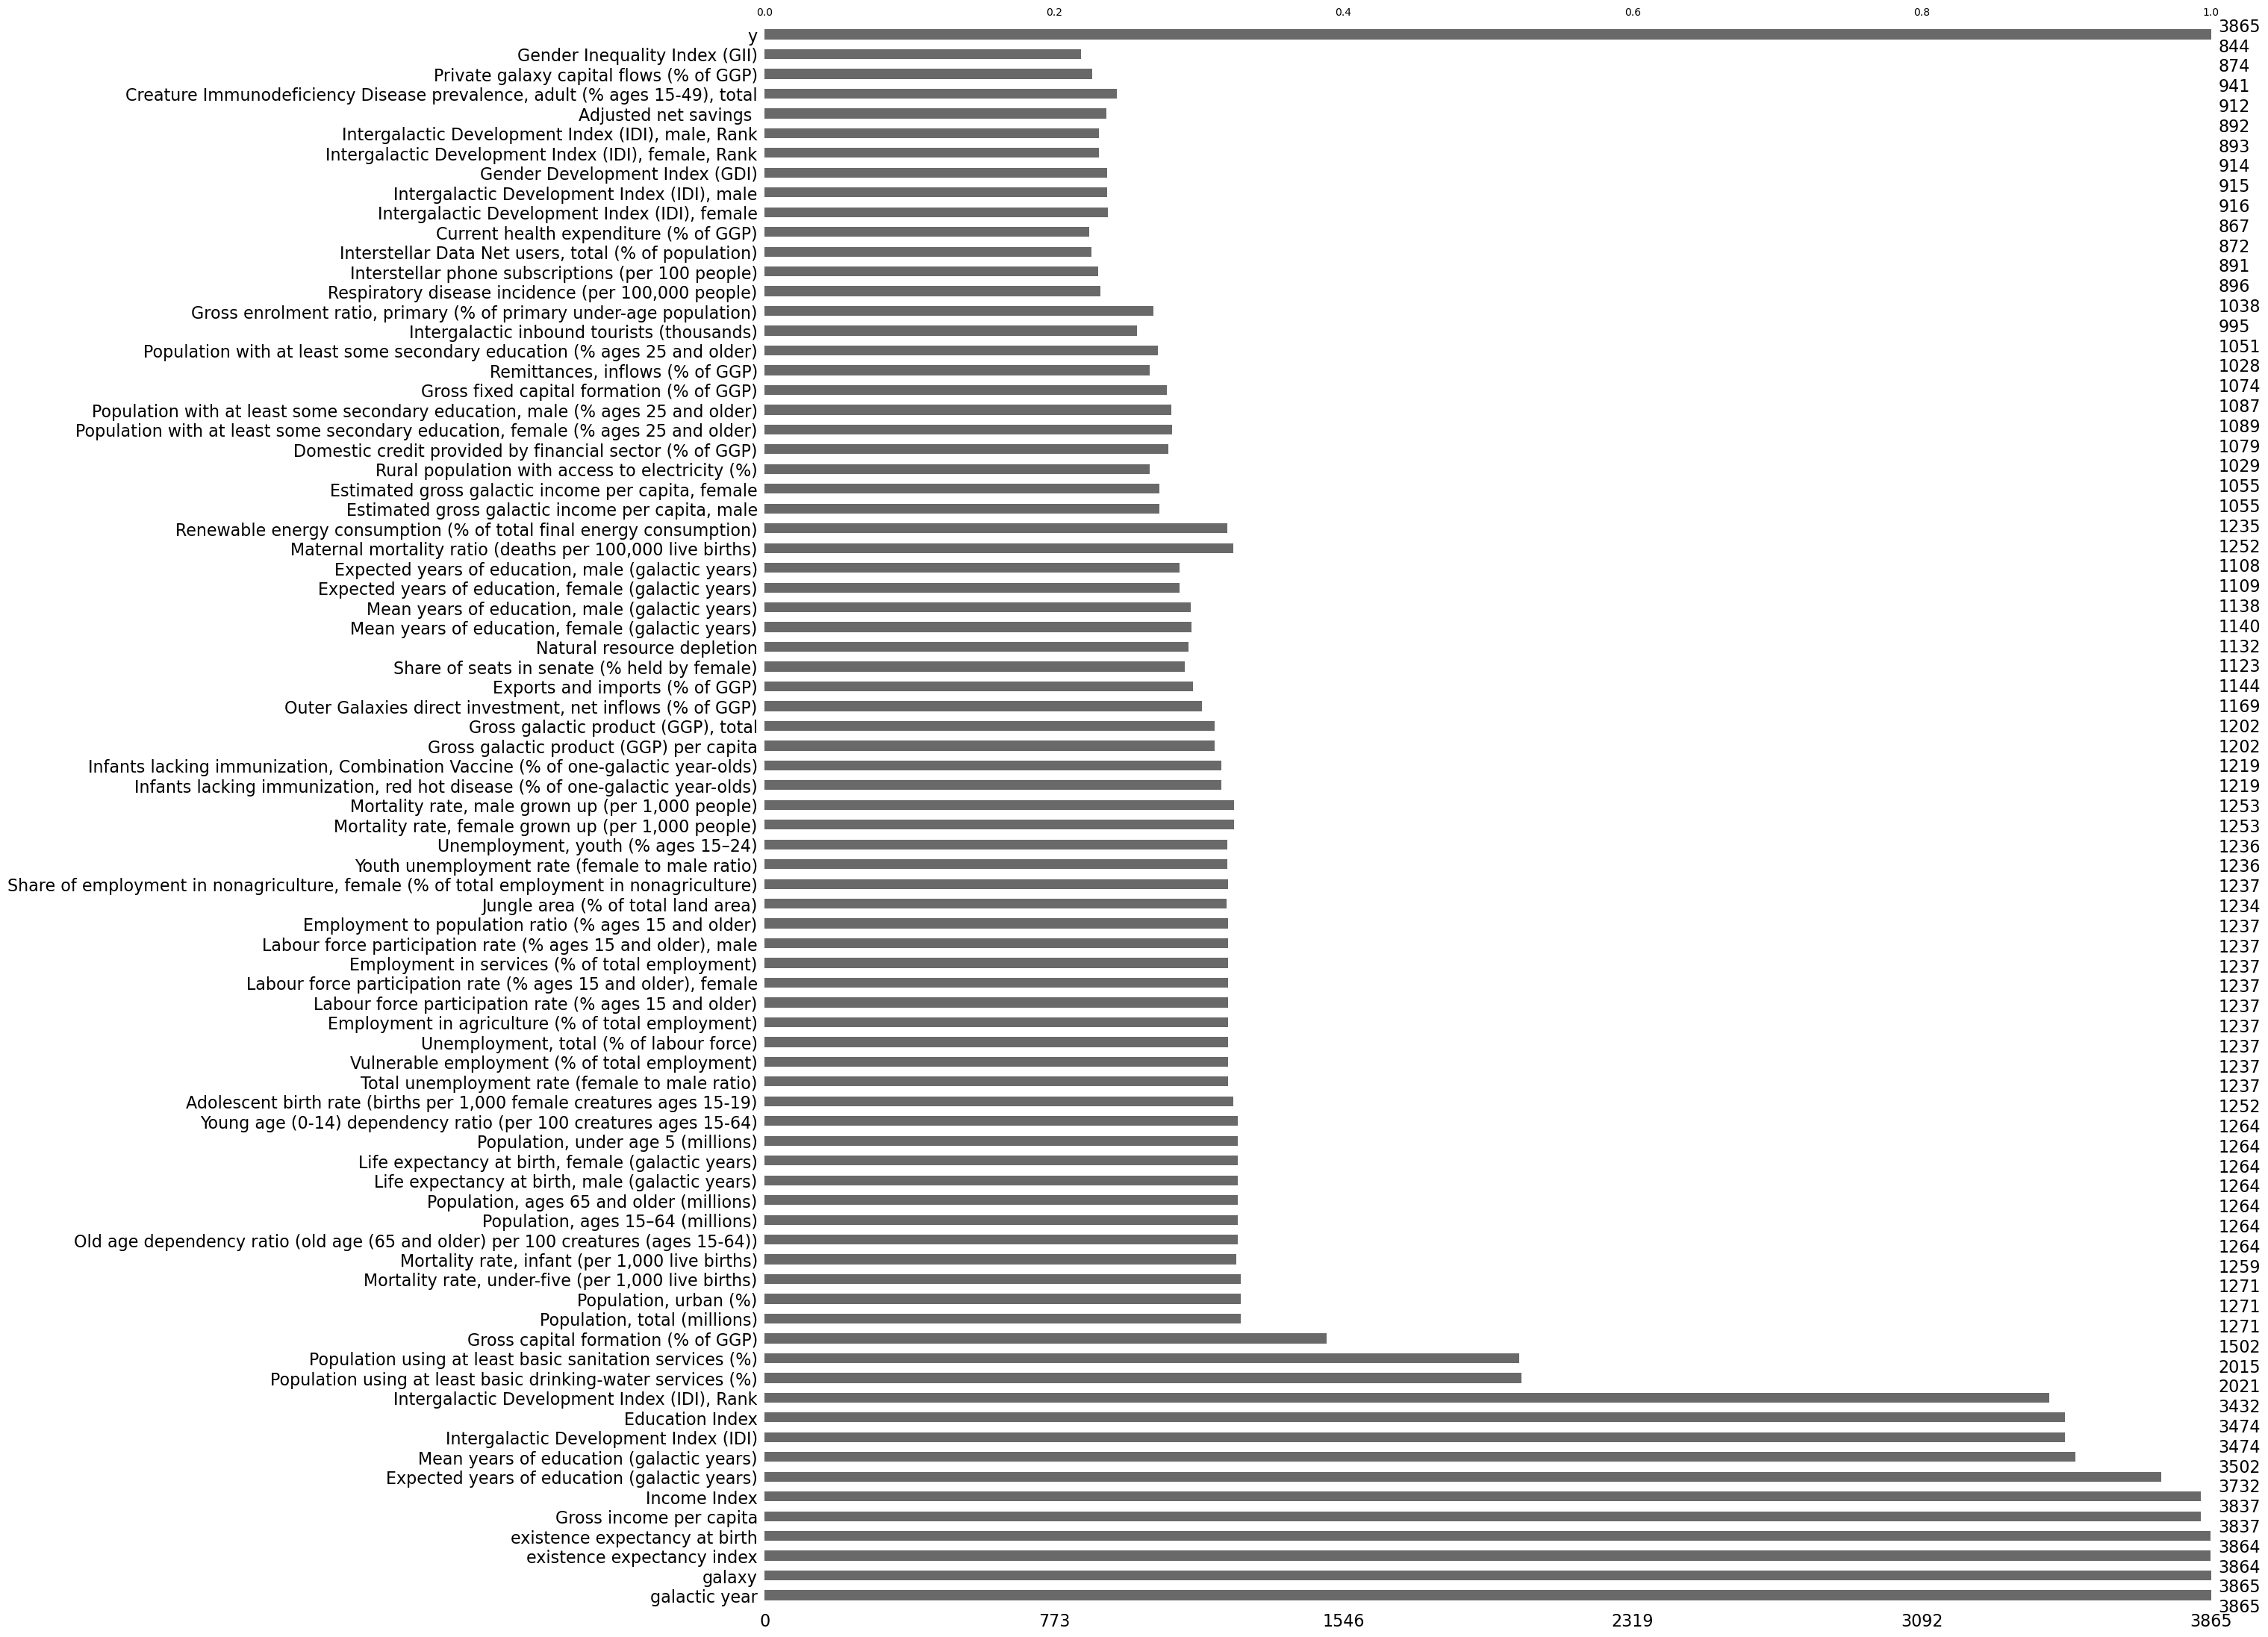

In [3]:
msno.bar(train_data)

<AxesSubplot:>

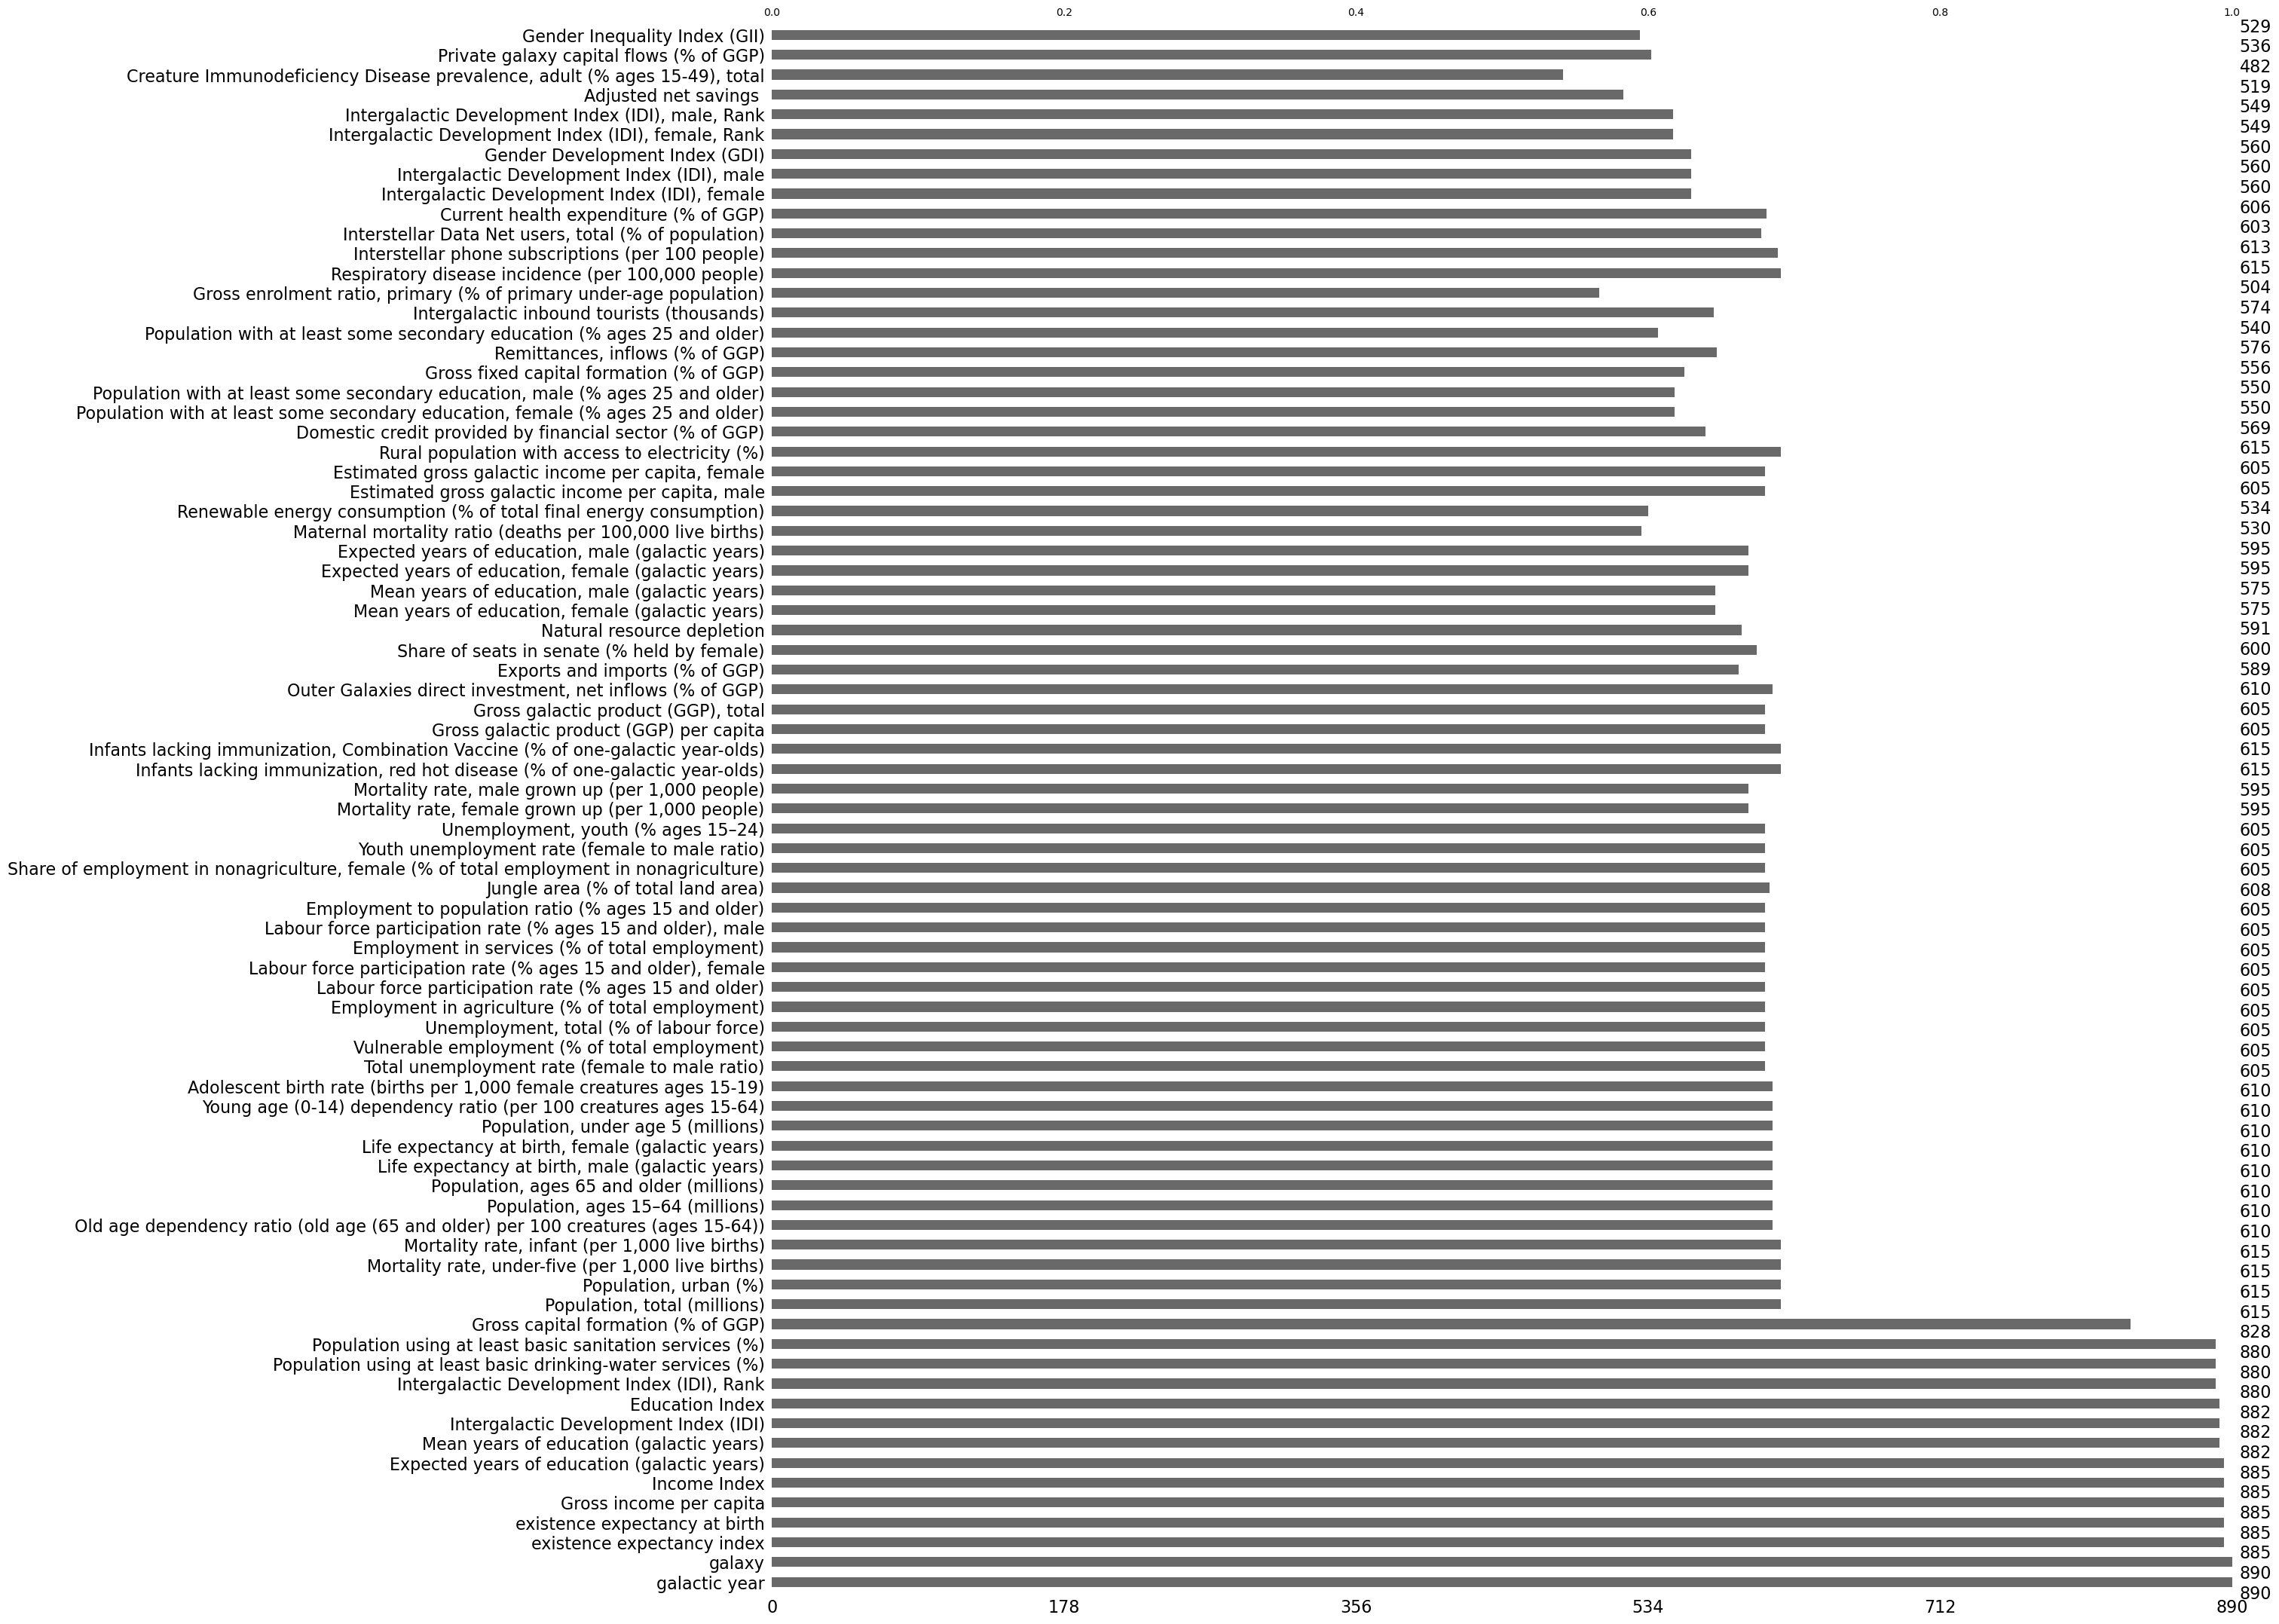

In [4]:
msno.bar(test_data)

In [5]:
train_data.drop(columns=train_data.iloc[:,10:79] ,inplace=True)
test_data.drop(columns=test_data.iloc[:,10:79] ,inplace=True)

In [6]:
train_data.drop(columns='galaxy' ,inplace=True)
test_data.drop(columns='galaxy' ,inplace=True)

In [7]:
train_data.fillna(train_data.median() ,inplace=True)
test_data.fillna(test_data.median(),inplace=True)

In [8]:
# Correcting inconsistencies

# Replace white spaces with underscores in column names
train_data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
test_data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# Feature Engineering

In [9]:
#Age of the Galaxy: 'galactic_year' from 'existence_expectancy_at_birth' to calculate the age of the galaxy.
train_data['age_of_galaxy'] = train_data['galactic_year'] - train_data['existence_expectancy_at_birth']
test_data['age_of_galaxy'] = test_data['galactic_year'] - test_data['existence_expectancy_at_birth']

In [10]:
#Economic Productivity: Multiply 'Gross_income_per_capita' by 'Income_Index' 
#to calculate the economic productivity of each galaxy.
train_data['economic_productivity'] = train_data['Gross_income_per_capita'] * train_data['Income_Index']
test_data['economic_productivity'] = test_data['Gross_income_per_capita'] * test_data['Income_Index']

In [11]:
# Education Gap: Calculate the difference between 'Expected_years_of_education_(galactic_years)' 
# and 'Mean_years_of_education_(galactic_years)'
# to measure the education gap in each galaxy.
train_data['education_gap'] = train_data['Expected_years_of_education_(galactic_years)'] - train_data['Mean_years_of_education_(galactic_years)']
test_data['education_gap'] = test_data['Expected_years_of_education_(galactic_years)'] - test_data['Mean_years_of_education_(galactic_years)']

In [12]:
#Overall Development Index: Combine the 'Intergalactic_Development_Index_(IDI)' and 
#'Education_Index' using a weighted average to create an overall development index.
train_data['overall_development_index'] = (train_data['Intergalactic_Development_Index_(IDI)'] + train_data['Education_Index']) / 2
test_data['overall_development_index'] = (test_data['Intergalactic_Development_Index_(IDI)'] + test_data['Education_Index']) / 2

In [13]:
#Life Expectancy: Calculate the life expectancy by dividing 'existence_expectancy_index' by 'existence_expectancy_at_birth'.
train_data['life_expectancy'] = train_data['existence_expectancy_index'] / train_data['existence_expectancy_at_birth']
test_data['life_expectancy'] = test_data['existence_expectancy_index'] / test_data['existence_expectancy_at_birth']


In [14]:
train_data.columns

Index(['galactic_year', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'Gross_income_per_capita',
       'Income_Index', 'Expected_years_of_education_(galactic_years)',
       'Mean_years_of_education_(galactic_years)',
       'Intergalactic_Development_Index_(IDI)', 'Education_Index', 'y',
       'age_of_galaxy', 'economic_productivity', 'education_gap',
       'overall_development_index', 'life_expectancy'],
      dtype='object')

In [15]:
# Define the new column order
new_column_order = ['galactic_year', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'Gross_income_per_capita',
       'Income_Index', 'Expected_years_of_education_(galactic_years)',
       'Mean_years_of_education_(galactic_years)',
       'Intergalactic_Development_Index_(IDI)', 'Education_Index', 'age_of_galaxy', 'economic_productivity', 'education_gap',
       'overall_development_index', 'life_expectancy','y']
# Reassign the columns in the new order
train_data = train_data[new_column_order]

In [16]:
train_data

,galactic_year,existence_expectancy_index,existence_expectancy_at_birth,Gross_income_per_capita,Income_Index,Expected_years_of_education_(galactic_years),Mean_years_of_education_(galactic_years),Intergalactic_Development_Index_(IDI),Education_Index,age_of_galaxy,economic_productivity,education_gap,overall_development_index,life_expectancy,y
0,990025,0.628657,63.125200,27109.234310,0.646039,8.240543,10.385465,0.824758,0.761255,9.899619e+05,17513.635254,-2.144923,0.793007,0.009959,0.052590
1,990025,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,9.899440e+05,25709.542096,5.929354,0.650748,0.010099,0.059868
2,990025,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,9.899654e+05,4218.840724,3.256343,0.416473,0.011070,0.050449
3,990025,0.555862,52.333293,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,9.899727e+05,22006.807217,4.557448,0.793007,0.010622,0.049394
4,990025,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,9.899432e+05,91662.587139,0.611765,0.914347,0.012117,0.154247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,1015056,1.029704,82.832063,34310.471408,0.855094,18.578586,10.557143,0.906573,0.862826,1.014973e+06,29338.680077,8.021442,0.884699,0.012431,0.042324
3861,1015056,0.937869,75.877098,36899.067719,0.929494,16.153857,9.151665,0.865822,0.747577,1.014980e+06,34297.475556,7.002192,0.806700,0.012360,0.036725
3862,1015056,1.036144,93.540275,37002.977875,1.085245,21.066473,16.661344,0.983835,1.100779,1.014962e+06,40157.303368,4.405129,1.042307,0.011077,0.166271
3863,1015056,0.939034,78.274427,28180.459770,0.687655,9.388911,8.908748,0.735694,0.602703,1.014978e+06,19378.440728,0.480163,0.669198,0.011997,0.024187


# Data Preprocessing

In [17]:
# Handling outliers
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

list_1 = train_data.columns


for cols in list_1:
    upper_bound,lower_bound = outlier_detection(train_data[cols])
    train_data[cols] = np.clip(train_data[cols],a_min=lower_bound,a_max=upper_bound)

In [18]:
# Split train data into X_train and y_train
X = train_data.iloc[:,:-1]
y = train_data['y']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, random_state=101, shuffle=True)

In [20]:
from sklearn.preprocessing import RobustScaler
#Scaling train_data
scaler=RobustScaler()
cols=X.columns
X=scaler.fit_transform(X)
X=pd.DataFrame(data=X,columns=cols)
X.head()

,galactic_year,existence_expectancy_index,existence_expectancy_at_birth,Gross_income_per_capita,Income_Index,Expected_years_of_education_(galactic_years),Mean_years_of_education_(galactic_years),Intergalactic_Development_Index_(IDI),Education_Index,age_of_galaxy,economic_productivity,education_gap,overall_development_index,life_expectancy
0,-0.906571,-1.214152,-1.087308,0.030707,-0.621907,-1.548192,0.000000,0.000000,0.000000,-0.906647,-0.172745,-2.012558,0.000000,-1.092595
1,-0.906571,-0.388931,0.137706,0.215358,0.085593,-0.986587,-1.212953,0.038706,-1.130600,-0.908274,0.218331,0.441495,-0.611272,-0.984843
2,-0.906571,-1.080034,-1.330852,-1.096652,-1.123789,-1.409650,-1.032073,-1.552676,-1.531520,-0.906324,-0.807120,-0.417347,-1.617933,-0.239086
3,-0.906571,-1.531281,-1.826704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.905666,0.041651,0.000699,0.000000,-0.583532
4,-0.906571,0.365232,0.192343,2.116555,1.042560,-0.263848,0.602595,0.373634,0.605404,-0.908346,2.143466,-1.267055,0.521390,0.565204


In [21]:
#scaling test_data
scaler=RobustScaler()
cols=test_data.columns
test_data=scaler.fit_transform(test_data)
test_data=pd.DataFrame(data=test_data,columns=cols)
test_data.head()

,galactic_year,existence_expectancy_index,existence_expectancy_at_birth,Gross_income_per_capita,Income_Index,Expected_years_of_education_(galactic_years),Mean_years_of_education_(galactic_years),Intergalactic_Development_Index_(IDI),Education_Index,age_of_galaxy,economic_productivity,education_gap,overall_development_index,life_expectancy
0,-0.798966,-2.598983,-2.409508,-0.810752,-0.964691,-1.293482,-0.106556,-1.202193,-0.865107,-0.796807,-0.680763,-1.656009,-1.078716,-2.464534
1,-0.798966,-2.206691,-1.953067,-1.256127,-0.677266,-1.994752,-1.104453,-1.389928,-1.349939,-0.797934,-0.882530,-0.937289,-1.440025,-2.096230
2,-0.599324,-2.041042,-1.779756,-0.035488,-0.960142,-0.992905,-0.988388,-1.211196,-1.097416,-0.598629,-0.308069,0.332002,-1.212496,-1.927654
3,-0.798966,-2.014795,-1.733606,-0.400231,-0.108969,-1.028529,-0.223458,-0.653237,-0.973892,-0.798476,-0.281146,-1.061539,-0.872514,-1.934758
4,0.400080,-1.895836,-2.098074,-0.217752,-1.219426,-1.298286,-0.907481,-1.264630,-0.785070,0.402018,-0.467963,-0.258787,-1.064478,-0.887840


# EDA (Exploratory Data Analysis)

In [22]:
# Summary statistics

print(train_data.describe())


       galactic_year  existence_expectancy_index  \
count   3.865000e+03                 3865.000000   
mean    1.000709e+06                    0.872703   
std     6.945463e+03                    0.161661   
min     9.900250e+05                    0.418841   
25%     9.950060e+05                    0.763158   
50%     1.000000e+06                    0.907359   
75%     1.006009e+06                    0.992703   
max     1.015056e+06                    1.246908   

       existence_expectancy_at_birth  Gross_income_per_capita  Income_Index  \
count                    3865.000000              3865.000000   3865.000000   
mean                       76.817440             30137.647047      0.825169   
std                        10.399811             14129.506256      0.193351   
min                        48.069996              -126.906522      0.292001   
25%                        69.963373             20251.444966      0.677846   
50%                        78.995101             26600.76

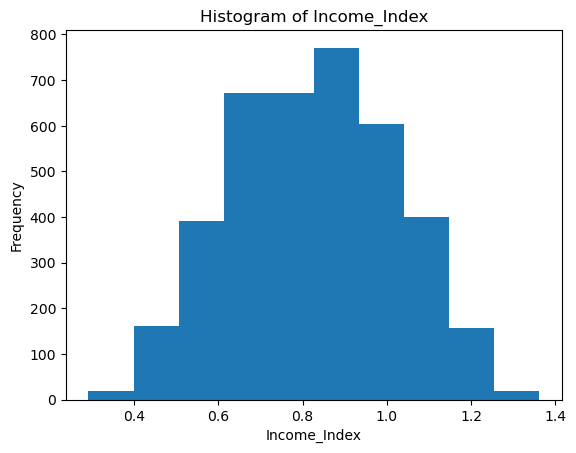

In [23]:
# Histogram
plt.hist(train_data['Income_Index'])
plt.xlabel('Income_Index')
plt.ylabel('Frequency')
plt.title('Histogram of Income_Index')
plt.show()

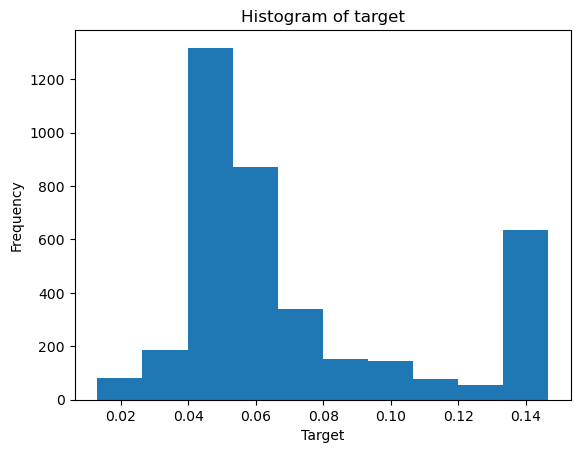

In [24]:
# Histogram Target
plt.hist(train_data['y'])
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of target')
plt.show()

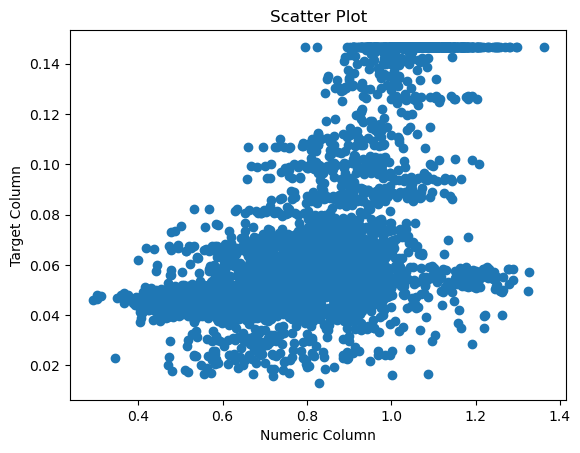

In [25]:
# Scatter plot
plt.scatter(train_data['Income_Index'], train_data['y'])
plt.xlabel('Numeric Column')
plt.ylabel('Target Column')
plt.title('Scatter Plot')
plt.show()

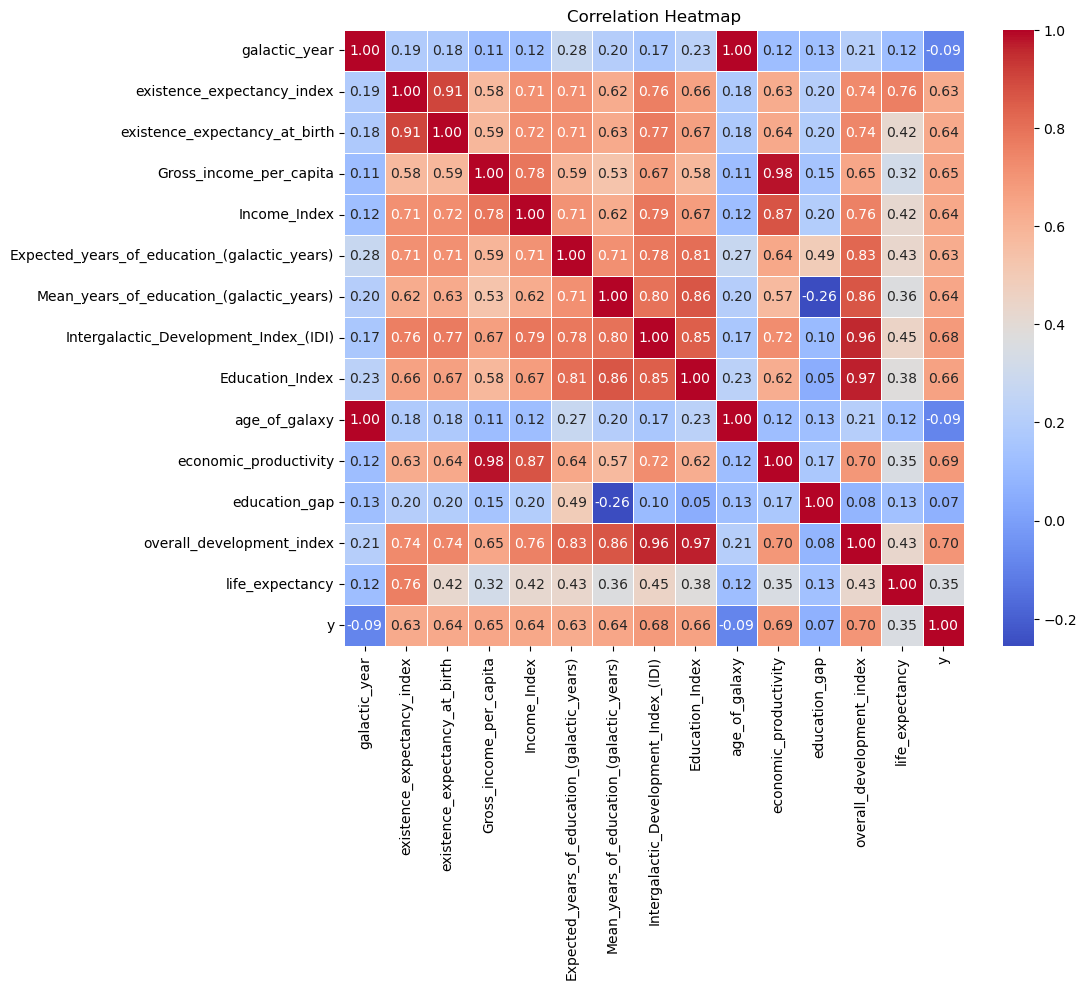

In [26]:
# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Create a correlation heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Modeling

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, random_state=101, shuffle=True)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Initialize the regression model
lr_model = LinearRegression()
# Train the regression model
lr_model.fit(X_train, y_train)
# Make predictions on the test data
lr_y_pred = lr_model.predict(X_test)
# Make predictions on the train data
lr_y_pred_train = lr_model.predict(X_train)

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)

# XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

In [29]:
print(lr_model.intercept_)

print(lr_model.coef_)

0.07581224016979779
[-7.70841082e+00  1.03976688e-01 -4.94870658e-02 -3.96958769e-02
 -2.70492713e-02  2.19682009e-02 -7.60444635e-03 -3.44004024e-02
 -3.12739821e-02  7.68613068e+00  6.85424973e-02 -1.27305989e-02
  7.02492535e-02 -4.15861023e-02]


# Performance Evaluation

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, lr_y_pred)
rmse = mean_squared_error(y_test, lr_y_pred, squared=False)
r2 = r2_score(y_test, lr_y_pred)

mse = mean_squared_error(y_train, lr_y_pred_train)
rmse = mean_squared_error(y_train, lr_y_pred_train, squared=False)
r2 = r2_score(y_train, lr_y_pred_train)

print('Test data')
print('MSE : ',round(mse,4))
print('RMSE : ',round(rmse,4))
print('R2 : ',round(r2,4))
print('\n')
print('Train data')
print('MSE : ',round(mse,4))
print('RMSE : ',round(rmse,4))
print('R2 : ',round(r2,4))

Test data
MSE :  0.0004
RMSE :  0.0207
R2 :  0.6945


Train data
MSE :  0.0004
RMSE :  0.0207
R2 :  0.6945


In [31]:
# Calculate evaluation metrics
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_r2 = r2_score(y_test, rf_y_pred)

In [32]:
# Calculate evaluation metrics
gb_rmse = mean_squared_error(y_test, gb_y_pred, squared=False)
gb_r2 = r2_score(y_test, gb_y_pred)

In [33]:
# Calculate evaluation metrics
svr_rmse = mean_squared_error(y_test, svr_y_pred, squared=False)
svr_r2 = r2_score(y_test, svr_y_pred)

In [34]:
# Calculate evaluation metrics
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_y_pred)

In [35]:
# Print the evaluation results
print("Random Forest Regression:")
print("RMSE:", round(rf_rmse,4))
print("R-squared:", round(rf_r2,4))
print("\n")

print("Gradient Boosting Regression:")
print("RMSE:", round(gb_rmse,4))
print("R-squared:",round(gb_r2,4))
print("\n")

print("Support Vector Regression:")
print("RMSE:", round(svr_rmse,4))
print("R-squared:", round(svr_r2,4))
print("\n")

print("XGBoost Regression:")
print("RMSE:", round(rmse,4))
print("R-squared:", round(r2,4))

Random Forest Regression:
RMSE: 0.0141
R-squared: 0.8473


Gradient Boosting Regression:
RMSE: 0.0142
R-squared: 0.8463


Support Vector Regression:
RMSE: 0.0371
R-squared: -0.0556


XGBoost Regression:
RMSE: 0.0207
R-squared: 0.6945


In [36]:
test_data['y_pred']=xgb_model.predict(test_data)

In [37]:
df1=pd.DataFrame(data=test_data,columns=test_data.columns)

In [38]:
df1.columns

Index(['galactic_year', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'Gross_income_per_capita',
       'Income_Index', 'Expected_years_of_education_(galactic_years)',
       'Mean_years_of_education_(galactic_years)',
       'Intergalactic_Development_Index_(IDI)', 'Education_Index',
       'age_of_galaxy', 'economic_productivity', 'education_gap',
       'overall_development_index', 'life_expectancy', 'y_pred'],
      dtype='object')

In [39]:
df1=df1.drop(columns=['galactic_year', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'Gross_income_per_capita',
       'Income_Index', 'Expected_years_of_education_(galactic_years)',
       'Mean_years_of_education_(galactic_years)',
       'Intergalactic_Development_Index_(IDI)', 'Education_Index',
       'age_of_galaxy', 'economic_productivity', 'education_gap',
       'overall_development_index', 'life_expectancy'])

In [43]:
df1

,y_pred
0,0.049851
1,0.047145
2,0.047716
3,0.051367
4,0.042464
...,...
885,0.055322
886,0.055322
887,0.055322
888,0.055322


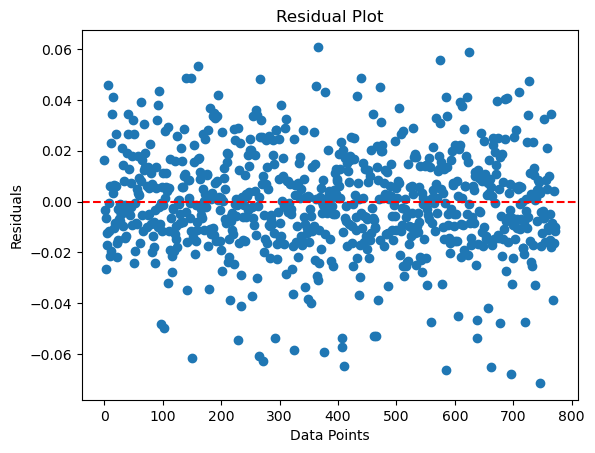

In [40]:
# Assuming you have your actual and predicted values in separate variables
actual_values = y_test
predicted_values = lr_y_pred

# Calculate residuals
residuals = [actual - predicted for actual, predicted in zip(actual_values, predicted_values)]

# Create a scatter plot of residuals
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# Optimization

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the hyperparameter grid for Grid Search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create the Grid Search object
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(),
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Best Model:", best_model)
print("\n")
print("Best Parameters:", best_params)
print("\n")
print("RMSE:", round(rmse,4))
print("R-squared:", round(r2,4))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


RMSE: 0.0132
R-squared: 0.8657


In [44]:
test_data.columns

Index(['galactic_year', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'Gross_income_per_capita',
       'Income_Index', 'Expected_years_of_education_(galactic_years)',
       'Mean_years_of_education_(galactic_years)',
       'Intergalactic_Development_Index_(IDI)', 'Education_Index',
       'age_of_galaxy', 'economic_productivity', 'education_gap',
       'overall_development_index', 'life_expectancy', 'y_pred'],
      dtype='object')

In [45]:
test_data.drop('y_pred',axis=1,inplace=True)

In [46]:
#Prediction real test_data
y_test_pred_opt=best_model.predict(test_data)

In [47]:
test_data['y_test_pred_opt']=best_model.predict(test_data)

In [48]:
df=pd.DataFrame(data=test_data,columns=test_data.columns)

In [49]:
df.columns

Index(['galactic_year', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'Gross_income_per_capita',
       'Income_Index', 'Expected_years_of_education_(galactic_years)',
       'Mean_years_of_education_(galactic_years)',
       'Intergalactic_Development_Index_(IDI)', 'Education_Index',
       'age_of_galaxy', 'economic_productivity', 'education_gap',
       'overall_development_index', 'life_expectancy', 'y_test_pred_opt'],
      dtype='object')

In [50]:
df=df.drop(columns=['galactic_year', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'Gross_income_per_capita',
       'Income_Index', 'Expected_years_of_education_(galactic_years)',
       'Mean_years_of_education_(galactic_years)',
       'Intergalactic_Development_Index_(IDI)', 'Education_Index',
       'age_of_galaxy', 'economic_productivity', 'education_gap',
       'overall_development_index', 'life_expectancy'])

In [51]:
df['y_pred']=df1['y_pred']

In [52]:
df

,y_test_pred_opt,y_pred
0,0.050834,0.049851
1,0.048833,0.047145
2,0.049715,0.047716
3,0.053714,0.051367
4,0.042979,0.042464
...,...,...
885,0.049476,0.055322
886,0.049476,0.055322
887,0.049476,0.055322
888,0.049476,0.055322


In [57]:
df=df.rename(columns={
   'y_test_pred_opt':'opt_pred' 
})

In [59]:
# Define the new column order
new_column_order = ['y_pred','opt_pred']
# Reassign the columns in the new order
df = df[new_column_order]

In [61]:
df.to_csv('output.csv', index=False)

# Description Data Received

In [53]:
import numpy as np
import pandas as pd

test_data

# Set the total available energy and the constraints
total_energy_available = 50000
minimum_energy_allocation = 0
maximum_energy_allocation = 100
minimum_allocation_low_index = 0.1

# Calculate the potential for increase in the index for each galaxy
train_data['potential'] = -np.log(train_data['existence_expectancy_index'] + 0.01) + 3
test_data['potential'] = -np.log(test_data['existence_expectancy_index'] + 0.01) + 3

# Calculate the likely increase in the index for each galaxy
train_data['likely_increase'] = train_data['potential'] ** 2
test_data['likely_increase'] = test_data['potential'] ** 2

# Calculate the extra energy based on the likely increase and constraints
train_data['extra_energy'] = (
    (train_data['likely_increase'] - train_data['likely_increase'].min())
    / (train_data['likely_increase'].max() - train_data['likely_increase'].min())
) * total_energy_available


# Calculate the extra energy based on the likely increase and constraints
test_data['extra_energy'] = (
    (test_data['likely_increase'] - test_data['likely_increase'].min())
    / (test_data['likely_increase'].max() - test_data['likely_increase'].min())
) * total_energy_available


# Apply the constraints to the extra energy column for train_data
train_data.loc[train_data['existence_expectancy_index'] < 0.7, 'extra_energy'] = (
    total_energy_available * minimum_allocation_low_index
)

train_data['extra_energy'] = np.clip(train_data['extra_energy'], minimum_energy_allocation, maximum_energy_allocation)

# Apply the constraints to the extra energy column for test_data
test_data.loc[train_data['existence_expectancy_index'] < 0.7, 'extra_energy'] = (
    total_energy_available * minimum_allocation_low_index
)

test_data['extra_energy'] = np.clip(test_data['extra_energy'], minimum_energy_allocation, maximum_energy_allocation)

# Print the generated 'extra_energy' column
print(train_data[['galactic_year', 'extra_energy']])



# Define the new column order
new_column_order = ['galactic_year', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'Gross_income_per_capita',
       'Income_Index', 'Expected_years_of_education_(galactic_years)',
       'Mean_years_of_education_(galactic_years)',
       'Intergalactic_Development_Index_(IDI)', 'Education_Index', 'age_of_galaxy', 'economic_productivity', 'education_gap',
       'overall_development_index', 'life_expectancy','potential',
       'likely_increase', 'extra_energy','y']
# Reassign the columns in the new order
train_data = train_data[new_column_order]

      galactic_year  extra_energy
0            990025         100.0
1            990025         100.0
2            990025         100.0
3            990025         100.0
4            990025         100.0
...             ...           ...
3860        1015056         100.0
3861        1015056         100.0
3862        1015056         100.0
3863        1015056         100.0
3864        1015056         100.0

[3865 rows x 2 columns]
